In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import OneClassSVM
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
import logging

ModuleNotFoundError: No module named 'numpy'

# Build plots

## Prove acc

In [ ]:
def plot_sorted(data):
    assert all(0 <= x <= 1 for I in data for x in I)
    assert len(data.shape) == 2
    if min(data.shape) < 10:
        logging.info(f"shape = {data.shape} is too small")
    vmin = np.floor(data.min() * 20) * 5
    vmax = np.ceil(data.max() * 20) * 5
    data = np.sort(data, axis = -1)[:, ::-1]
    plt.imshow(data * 100, cmap='YlGnBu', origin='lower', vmin=vmin, vmax=vmax)
    plt.xlabel('Head (sorted)')
    plt.ylabel('Layer')
    plt.yticks(np.arange(data.shape[0]), rotation=90)
    plt.xticks([])
    cbar = plt.colorbar(ticks = range(int(vmin), int(vmax)+1, 5))

    plt.show()

## Contour


In [ ]:
def plot_contour(data_0, data_1):
    g = sns.JointGrid()

    # Plot the density and scatter plot for the truthful data
    sns.kdeplot(x=data_0[:, 0], y=data_0[:, 1], ax=g.ax_joint, color="blue", label='Truthful')
    sns.kdeplot(data_0[:, 0], ax=g.ax_marg_x, color="blue")
    sns.kdeplot(y=data_0[:, 1], ax=g.ax_marg_y, color="blue")

    # Plot the density and scatter plot for the false data
    sns.kdeplot(x=data_1[:, 0], y=data_1[:, 1], ax=g.ax_joint, color="orange", label='False')
    sns.kdeplot(data_1[:, 0], ax=g.ax_marg_x, color="orange")
    sns.kdeplot(y=data_1[:, 1], ax=g.ax_marg_y, color="orange")

    # Enhance the plot
    g.ax_joint.set_xlabel('Projection on the 1st Truthful Direction')
    g.ax_joint.set_ylabel('Projection on the 2nd Truthful Direction')
    g.ax_joint.legend()

    plt.show()

## figure 2

In [ ]:
def figure_2(data, data_0, data_1):
    plt.figure(figsize = (12.8, 4.8))
    plt.subplot(121)
    assert all(0 <= x <= 1 for I in data for x in I)
    assert len(data.shape) == 2
    if min(data.shape) < 10:
        logging.info(f"shape = {data.shape} is too small")
    vmin = np.floor(data.min() * 20) * 5
    vmax = np.ceil(data.max() * 20) * 5
    data = np.sort(data, axis = -1)[:, ::-1]
    plt.imshow(data * 100, cmap='YlGnBu', origin='lower', vmin=vmin, vmax=vmax)
    plt.xlabel('Head (sorted)')
    plt.ylabel('Layer')
    plt.yticks(np.arange(data.shape[0]), rotation=90)
    plt.xticks([])
    cbar = plt.colorbar(ticks = range(int(vmin), int(vmax)+1, 5))

    # g = sns.JointGrid()
    plt.subplot(122)
    g = sns.JointGrid(height=4.8, ratio=5, space=0.2, ax=plt.gca())

    # Plot the density and scatter plot for the truthful data
    sns.kdeplot(x=data_0[:, 0], y=data_0[:, 1], ax=g.ax_joint, color="blue", label='Truthful')
    sns.kdeplot(data_0[:, 0], ax=g.ax_marg_x, color="blue")
    sns.kdeplot(y=data_0[:, 1], ax=g.ax_marg_y, color="blue")

    # Plot the density and scatter plot for the false data
    sns.kdeplot(x=data_1[:, 0], y=data_1[:, 1], ax=g.ax_joint, color="orange", label='False')
    sns.kdeplot(data_1[:, 0], ax=g.ax_marg_x, color="orange")
    sns.kdeplot(y=data_1[:, 1], ax=g.ax_marg_y, color="orange")

    # Enhance the plot
    g.ax_joint.set_xlabel('Projection on the 1st Truthful Direction')
    g.ax_joint.set_ylabel('Projection on the 2nd Truthful Direction')
    g.ax_joint.legend()

    plt.show()

TypeError: ignored

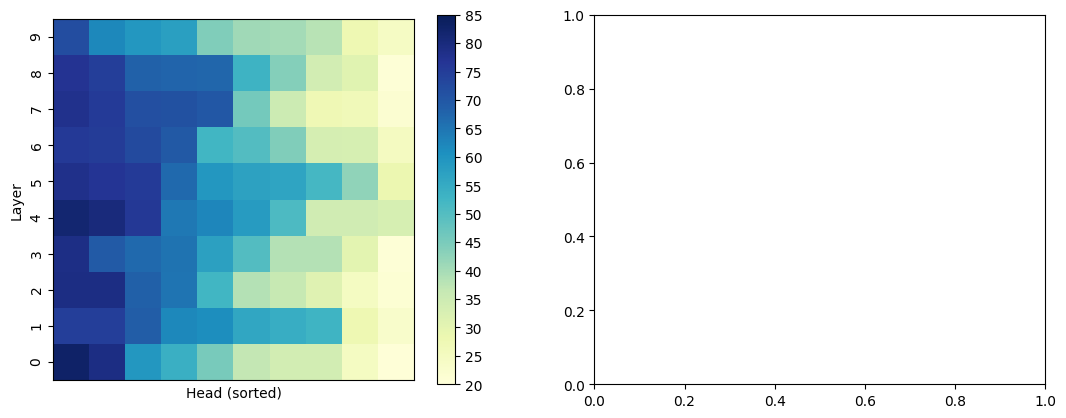

In [ ]:
X = np.concatenate([np.random.uniform(-2, 2, [100, 52]), np.random.normal(0, 1, [100, 52])], 0)
Y = np.array([0]*100 + [1] * 100)
Z = apply_svm(X, Y, 2)
data = np.random.uniform(0.2, 0.83, (10, 10))  # 예시 데이터입니다.
figure_2(data, Z[:100], Z[100:])

## Matrix

In [ ]:
def figure_4(True_Info, True_, MC_, CE_, KL_, X_ticks, Y_ticks):
    assert list(True_Info.shape) == [len(Y_ticks), len(X_ticks)]
    assert list(True_.shape) == [len(Y_ticks), len(X_ticks)]
    assert list(MC_.shape) == [len(Y_ticks), len(X_ticks)]
    assert list(CE_.shape) == [len(Y_ticks), len(X_ticks)]
    assert list(KL_.shape) == [len(Y_ticks), len(X_ticks)]
    plt.figure(figsize = (12.8, 4.8))
    # Heatmap for True*Informative (%)
    plt.subplot(1, 2, 1)
    sns.heatmap(True_Info * 100, annot=True, fmt=".1f", cmap='Blues')
    plt.title('True*Informative (%)')
    plt.xlabel('Intervention Strength α')
    plt.ylabel('Number of Heads intervened')
    plt.xticks(ticks=range(len(X_ticks)), labels=X_ticks)
    plt.yticks(ticks=range(len(Y_ticks)), labels=Y_ticks)

    # Heatmap for True (%)
    plt.subplot(2, 4, 3)
    sns.heatmap(True_ * 100, annot=True, fmt=".1f", cmap='Blues')
    plt.title('True (%)')
    plt.xticks(ticks=range(len(X_ticks)), labels=X_ticks)
    plt.yticks(ticks=range(len(Y_ticks)), labels=Y_ticks)

    # Heatmap for MC accuracy (%)
    plt.subplot(2, 4, 7)
    sns.heatmap(MC_ * 100, annot=True, fmt=".1f", cmap='Blues')
    plt.title('MC accuracy (%)')
    plt.xticks(ticks=range(len(X_ticks)), labels=X_ticks)
    plt.yticks(ticks=range(len(Y_ticks)), labels=Y_ticks)

    # Heatmap for Cross Entropy Loss
    plt.subplot(2, 4, 4)
    sns.heatmap(CE_ * 100, annot=True, fmt=".1f", cmap='Blues')
    plt.title('Cross Entropy Loss')
    plt.xticks(ticks=range(len(X_ticks)), labels=X_ticks)
    plt.yticks(ticks=range(len(Y_ticks)), labels=Y_ticks)

    # Heatmap for KL Divergence
    plt.subplot(2, 4, 8)
    sns.heatmap(KL_ * 100, annot=True, fmt=".1f", cmap='Blues')
    plt.title('KL Divergence')
    plt.xticks(ticks=range(len(X_ticks)), labels=X_ticks)
    plt.yticks(ticks=range(len(Y_ticks)), labels=Y_ticks)

    # Adjust the layout
    plt.tight_layout()

    # Display the figure
    plt.show()

# Preprocessing

## PCA decomposition

In [ ]:
def apply_pca(data, n_components=2):
    pca = PCA(n_components=n_components)
    transformed_data = pca.fit_transform(data)
    return transformed_data

## SVM decomposition

In [ ]:
def apply_svm(data, y, n_components=2):
    clf = OneClassSVM()
    clf.fit(data, y)
    axis = clf.dual_coef_ @ clf.support_vectors_
    axis = (axis / np.linalg.norm(axis))[0]
    TF1 = np.einsum("i,ji->j", axis, data)

    data = data - np.einsum("j,ji->ji", TF1, data)
    clf = OneClassSVM()
    clf.fit(data, y)
    axis = clf.dual_coef_ @ clf.support_vectors_
    axis = (axis / np.linalg.norm(axis))[0]
    TF2 = np.einsum("i,ji->j", axis, data)

    return np.stack([TF1, TF2], axis=1)
def apply_svm(data, y, n_components=2):
    axes = []
    clf = LogisticRegression()
    clf.fit(data, y)
    axis = clf.coef_[0]
    axis = (axis / np.linalg.norm(axis))
    TF1 = np.einsum("i,ji->j", axis, data)
    axes.append(axis)

    data = data - np.einsum("j,i->ji", TF1, axis)
    TF0 = np.einsum("i,ji->j", axis, data)
    clf = LogisticRegression()
    clf.fit(data, y)
    axis = clf.coef_[0]
    axis = (axis / np.linalg.norm(axis))
    TF2 = np.einsum("i,ji->j", axis, data)
    axes.append(axis)

    a1, a2 = axes
    print((a1 * a2).sum())
    return np.stack([TF1, TF2], axis=1)#

# TEST CODE

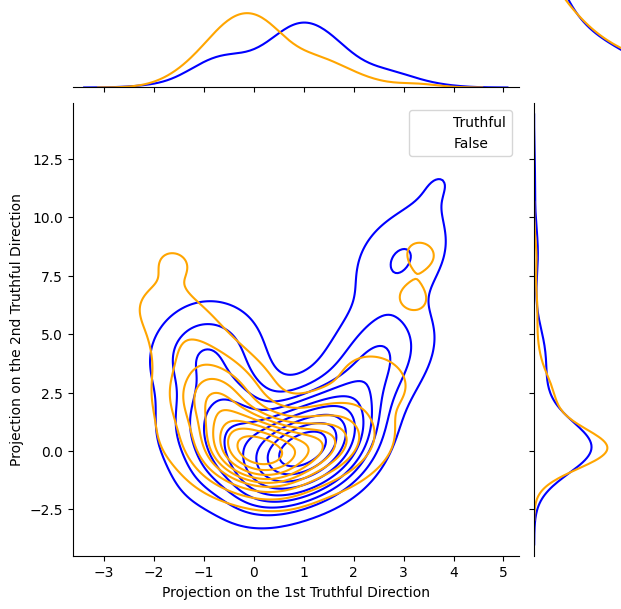

In [ ]:
X = np.concatenate([np.random.uniform(-2, 2, [100, 52]), np.random.normal(0, 1, [100, 52])], 0)
Y = np.array([0]*100 + [1] * 100)
Z = apply_svm(X, Y, 2)
plot_contour(Z[:100], Z[100:])

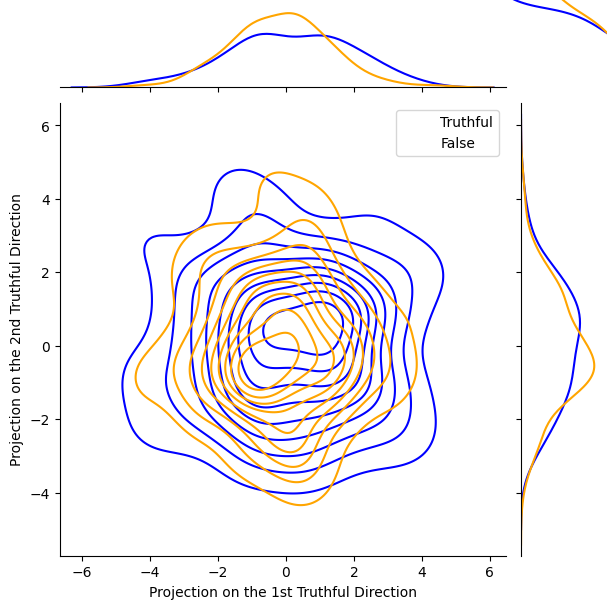

In [ ]:
X = np.concatenate([np.random.uniform(-2, 2, [100, 52]), np.random.normal(0, 1, [100, 52])], 0)
Y = np.array([0]*100 + [1] * 100)
Z = apply_pca(X, 2)
plot_contour(Z[:100], Z[100:])

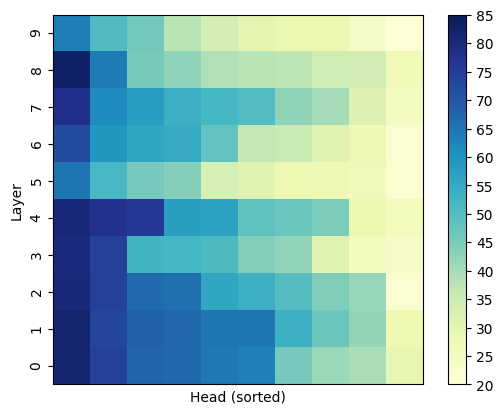

In [ ]:

data = np.random.uniform(0.2, 0.83, (10, 10))  # 예시 데이터입니다.
plot_sorted(data)

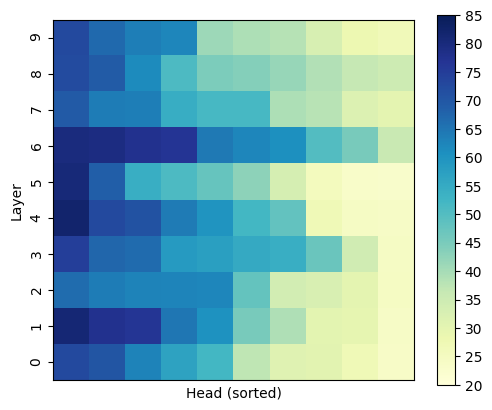

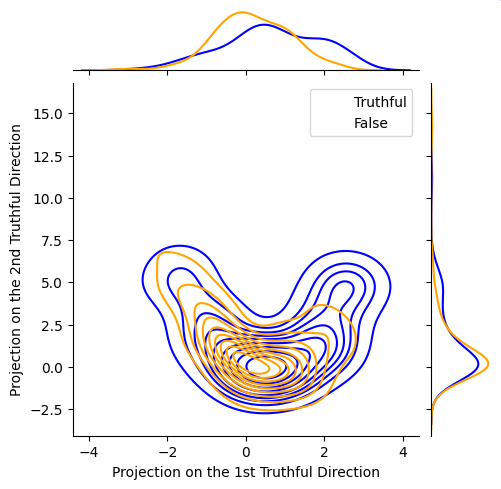

In [ ]:
X = np.concatenate([np.random.uniform(-2, 2, [100, 52]), np.random.normal(0, 1, [100, 52])], 0)
Y = np.array([0]*100 + [1] * 100)
Z = apply_svm(X, Y, 2)
data = np.random.uniform(0.2, 0.83, (10, 10))  # 예시 데이터입니다.
figure_2(data, Z[:100], Z[100:])

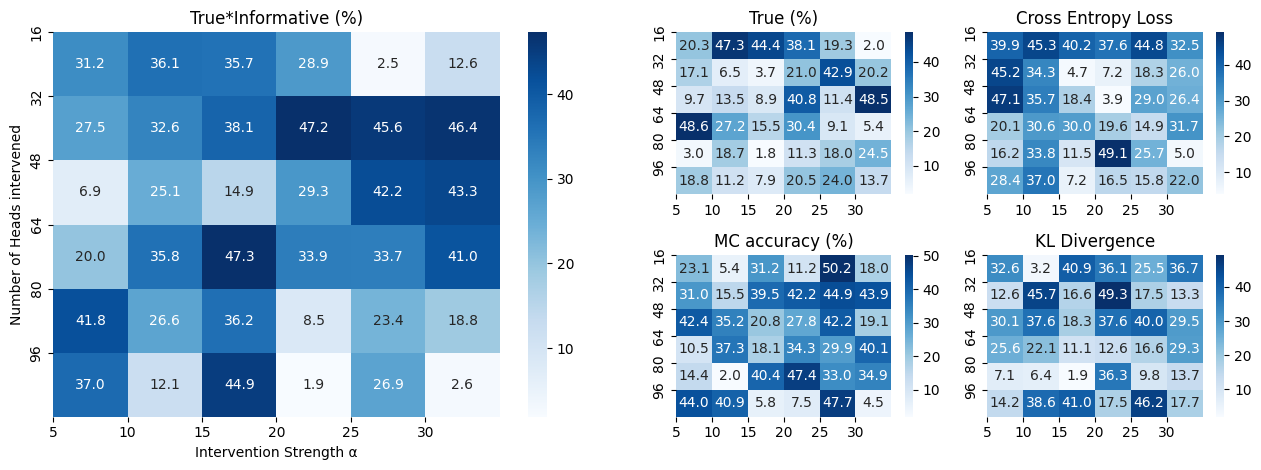

In [ ]:
figure_4(np.random.uniform(0.014, 0.51, (6, 6)), np.random.uniform(0.014, 0.51, (6, 6)), np.random.uniform(0.014, 0.51, (6, 6)), np.random.uniform(0.014, 0.51, (6, 6)), np.random.uniform(0.014, 0.51, (6, 6)), range(5, 35, 5), range(16, 97, 16))